# Prediction of Mutation Effect


<b><i class="fa fa-folder-o" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Location</b><br>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">C:\Users\ibrah\Documents\GitHub\Predicting-Mutation-Effects\src</code>
</p>

<b><i class="far fa-file" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Name</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">single_protein_single_mutation.ipynb</code>
</p>

<b><i class="far fa-calendar-alt" area-hidden="true" style="color:#1976D2"> </i>&nbsp; Last Edited</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">August 18th, 2021</code>
</p>


<div class="alert alert-block" style="background-color: #F5F5F5; border: 1px solid; padding: 10px; border-color: #E0E0E0">
    <b><i class="fa fa-compass" aria-hidden="true" style="color:#404040"></i></b>&nbsp; <b style="color: #404040">Purpose </b> <br>
<div>

    
- [x] $\textit{mutation effect label}$ prediction using Random Forest algorithm.
    

- [x] Classification will be $\textit{Disrupting vs (No effect + Increasing)}$.
    > $\textit{Disrupting} → 0$\
    > $\textit{No effect + Increasing} → 1$\
    > $\textit{Decreasing} → \textit{ignored}$
    
    
- [x] Evaluate the performane of the model.
    
- [x] We use SHAP in feature selection
    
    
- [x] Apply on Cancer Datasets
    > For now, a portion of all BRCA. But will be updated.
     
    
**Dependent files:**
* Training (mutations) data:
    - *training_data_M1.txt*


* Target (Cancer) data: 
    - *BRCA_INTERFACE_A2.txt*

## Setup

In [4]:
# Common imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
from IPython.display import display
from tqdm.notebook import tqdm
from helpers.common import print_annotation, get_file_path
from helpers.displayers import display_label_counts

# To make this notebook's output stable across runs
np.random.seed(42)

# PATHS
# PATHS
PROJECT_COMMON_FILE_DIR = "../data/"
MUTATIONS_PATH = "training_data_M1.txt"
INITIAL_COLUMNS_PATH = "../data/initial_columns_59.csv"
BRCA_PATH = "../data/BRCA_INTERFACE_A2.txt"

## Reading the Datasets

### 1. Training Data: Mutations

In [5]:
# Read Training Data
mutations = pd.read_csv(get_file_path(PROJECT_COMMON_FILE_DIR, MUTATIONS_PATH), sep='\t')

# Size of dataframe
print_annotation(f"Size of dataframe: {mutations.shape}")

# First 5 entries
mutations.head()


Size of dataframe: (1101, 104)
------------------------------


,Mutation_Effect_Label,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,mutation decreasing rate(MI:1130),P63000,P63000,Q61L,done,interface,-,-,-,Ras,...,378.0,40.0165,40.2638,61.9441,61.9441,None,None,None,3.7681,3.21627
1,mutation decreasing rate(MI:1130),P63000,P63000,Q61L,done,interface,-,-,-,Ras,...,378.0,40.0165,40.2638,61.9441,61.9441,None,None,None,3.7681,3.21627
2,mutation decreasing rate(MI:1130),P63000,P63000,Q61L,done,interface,-,-,-,Ras,...,378.0,40.0165,40.2638,61.9441,61.9441,None,None,None,3.7681,3.21627
3,mutation decreasing rate(MI:1130),P63000,P63000,Q61L,done,interface,-,-,-,Ras,...,378.0,40.0165,40.2638,61.9441,61.9441,None,None,None,3.7681,3.21627
4,mutation decreasing rate(MI:1130),P63000,P63000,Q61L,done,interface,-,-,-,Ras,...,378.0,40.0165,40.2638,61.9441,61.9441,None,None,None,3.7681,3.21627


### 2. Target Data

Cancer datasets whose feature columns have been collected from ELASPIC.

**BRCA**

In [7]:
# Read BRCA Data
brca = pd.read_csv(get_file_path(PROJECT_COMMON_FILE_DIR, BRCA_PATH), sep='\t')

# Size of dataframe
print_annotation(f"Size of dataframe: {brca.shape}")

# First 3 entries
brca.head(3)


Size of dataframe: (4452, 103)
------------------------------


,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,Domain_clan,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,Q9UKS6,Q9UKS6,R24H,done,interface,-,-,-,FCH,FCH,...,571.0,58.4741,57.8248,44.4473,44.4473,1524.89,732.135,2257.02,3.01412,3.16742
1,Q9UKS6,Q9UKS6,R24H,done,interface,-,-,-,FCH,FCH,...,565.0,56.4873,56.3099,69.6442,69.6442,1500.95,795.265,2296.21,3.26366,4.98813
2,Q9UKS6,Q9UKS6,R24H,done,interface,-,-,-,FCH,FCH,...,565.0,62.2267,62.0808,67.3261,67.3261,1555.45,776.3,2331.75,3.55240,4.79224


**COAD**

In [8]:
# # Read COAD Data
# coad = pd.read_csv(get_file_path(COAD_PATH), sep='\t')

# # Size of dataframe
# print_annotation(f"Size of dataframe: {coad.shape}")

# # First 3 entries
# coad.head(3)

**OV**

In [9]:
# # Read OV Data
# ov = pd.read_csv(get_file_path(OV_PATH), sep='\t')

# # Size of dataframe
# print_annotation(f"Size of dataframe: {ov.shape}")

# # First 3 entries
# ov.head(3)

## Data Cleaning

### Select column names

In [10]:
initial_columns_train = pd.read_csv(INITIAL_COLUMNS_PATH)['0'].to_list()
# ['Mutation_Effect_Label'] + ['UniProt_ID', 'Mutation', 'Interactor_UniProt_ID'] + remaining feature list
initial_columns_train_with_protein_mutation_interactor = [initial_columns_train[0]] + ['UniProt_ID', 'Mutation', 'Interactor_UniProt_ID'] + initial_columns_train[1:]

In [11]:
initial_columns_target = initial_columns_train.copy()
initial_columns_target.remove('Mutation_Effect_Label')

In [12]:
initial_columns_train_with_protein_mutation_interactor

['Mutation_Effect_Label',
 'UniProt_ID',
 'Mutation',
 'Interactor_UniProt_ID',
 'Template_sequence_identity',
 'Alignment_score',
 'Interactor_template_sequence_identity',
 'Interactor_alignment_score',
 'Final_ddG',
 'ProtBert_score',
 'ProteinSolver_score',
 'EL2_score',
 'Model/DOPE_score',
 'Provean_score',
 'Matrix_score',
 'Solvent_accessibility_wt',
 'Solvent_accessibility_mut',
 'pcv_vdW_wt',
 'pcv_vdW_mut',
 'pcv_vdW_self_wt',
 'pcv_vdW_self_mut',
 'dg_wt',
 'backbone_hbond_wt',
 'sidechain_hbond_wt',
 'van_der_waals_wt',
 'electrostatics_wt',
 'solvation_polar_wt',
 'solvation_hydrophobic_wt',
 'van_der_waals_clashes_wt',
 'entropy_sidechain_wt',
 'entropy_mainchain_wt',
 'torsional_clash_wt',
 'backbone_clash_wt',
 'helix_dipole_wt',
 'electrostatic_kon_wt',
 'energy_ionisation_wt',
 'number_of_residues_wt',
 'dg_mut',
 'backbone_hbond_mut',
 'sidechain_hbond_mut',
 'van_der_waals_mut',
 'electrostatics_mut',
 'solvation_polar_mut',
 'solvation_hydrophobic_mut',
 'van_der_w

### Reduce Columns

#### Train (Mutations) Data

In [ ]:
# Declare train data using selected column names
train_data = mutations[initial_columns_train_with_protein_mutation_interactor].copy()

# Size of dataframe
print_annotation(f"Size of dataframe: {train_data.shape}")

# First 5 entries
train_data.head()

In [16]:
# Dropping the duplicates
train_data.drop_duplicates(keep="first", inplace=True)

Ensuring that there is no duplicated row.

In [ ]:
train_data[train_data.duplicated()].empty  # True, duplicate is empty

In [19]:
train_data.shape

(1101, 62)

#### Target (Cancer) Data

**BRCA**

In [13]:
# Declare target_brca data using selected column names
target_brca_data = brca[initial_columns_target].copy(deep=True)

# Size of dataframe
print_annotation(f"Size of dataframe: {target_brca_data.shape}")

# First 3 entries
target_brca_data.head(3)


Size of dataframe: (4452, 58)
-----------------------------


,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,ProteinSolver_score,EL2_score,Model/DOPE_score,Provean_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,0.5343,0.530760,0.9857,0.936088,0.730056,0.957609918201342,0.741487597115338,1.76123535329794,-1.137780,-4.726,...,571.0,58.4741,57.8248,44.4473,44.4473,1524.89,732.135,2257.02,3.01412,3.16742
1,0.5884,0.579682,0.9928,0.993160,0.795178,0.927518657408655,0.0195063538849354,1.12969519749536,-0.929739,-4.726,...,565.0,56.4873,56.3099,69.6442,69.6442,1500.95,795.265,2296.21,3.26366,4.98813
2,0.5884,0.579682,0.9928,0.993160,1.03054,0.927518657408655,0.0146090686321259,1.27036083414174,-0.896799,-4.726,...,565.0,62.2267,62.0808,67.3261,67.3261,1555.45,776.3,2331.75,3.55240,4.79224


**COAD**

In [14]:
# # Declare target_coad data using selected column names
# target_coad_data = coad[initial_columns_target].copy(deep=True)

# # Size of dataframe
# print_annotation(f"Size of dataframe: {target_coad_data.shape}")

# # First 3 entries
# target_coad_data.head(3)

**OV**

In [15]:
# # Declare target_ov data using selected column names
# target_ov_data = ov[initial_columns_target].copy(deep=True)

# # Size of dataframe
# print_annotation(f"Size of dataframe: {target_ov_data.shape}")

# # First 3 entries
# target_ov_data.head(3)

## Data Preprocessing

* [x] Not all selected columns are interpreted as numeric, so coerce them to numeric.

### Mutation Effect Label Binning

Mutation Effect label binning is only applied to train_data.

* [x] Apply Label binning.
    > $\textit{Disruptive} → 0$\
    > $\textit{No effect + Increasing} → 1$\
    > $\textit{Decreasing} → \textit{ignored}$


In [16]:
def display_label_counts(data_param):
    """
    Display a dataframe that contains label categories and their counts.
    """
    label_counts = pd.DataFrame(data_param["Mutation_Effect_Label"].value_counts())
    label_counts.reset_index(inplace=True)
    label_counts.columns = ["Mutation_Effect_Label", "Counts"]
    label_counts.rename(index={0: 'Disrupting', 1: 'Increasing + No Effect'}, inplace=True)
    display(label_counts)

In [17]:
def display_labels(data_param):
    """
    Display a dataframe that contains label categories.
    """
    label_counts = pd.DataFrame(data_param["Mutation_Effect_Label"].value_counts().index)
    label_counts.columns = ["Mutation_Effect_Label"]
    display(label_counts)

For $\textit{mutation effect label}$ we have following categories:

In [18]:
# Displaying possible label categories.
display_labels(train_data)

,Mutation_Effect_Label
0,mutation disrupting(MI:0573)
1,mutation decreasing(MI:0119)
2,mutation disrupting strength(MI:1128)
3,mutation decreasing strength(MI:1133)
4,mutation with no effect(MI:2226)
5,disrupting
6,mutation increasing(MI:0382)
7,mutation increasing strength(MI:1132)
8,mutation decreasing rate(MI:1130)
9,mutation disrupting rate(MI:1129)


Applying binning operation on $\textit{mutation effect label}$ column in $\textit{mutations}$ data with described rule below \
    - $\textit{Disrupting} → 0$\
    - $\textit{No effect + Increasing} → 1$\
    - $\textit{Decreasing} → \textit{dropped}$\
    - $\textit{Causing} → \textit{dropped}$\
yields following data frame:

In [19]:
labels_to_bins = { 
    "mutation disrupting(MI:0573)": 0,
    "mutation decreasing(MI:0119)": "IGNORED",
    "mutation disrupting strength(MI:1128)": 0,
    "mutation decreasing strength(MI:1133)": "IGNORED",
    "mutation with no effect(MI:2226)": 1,
    "disrupting": 0,
    "mutation increasing(MI:0382)": 1,
    "mutation increasing strength(MI:1132)": 1,
    "mutation decreasing rate(MI:1130)": "IGNORED",
    "mutation disrupting rate(MI:1129)": 0,
    "mutation causing(MI:2227)": "IGNORED",
    "mutation increasing rate(MI:1131)": 1}

replace_map = {"Mutation_Effect_Label": labels_to_bins}

In [20]:
# Size of dataframe before binning.
print_annotation(f"Size of dataframe before binning: {train_data.shape}")

# Modifications will be done on train_data_binned.
train_data_binned = train_data.copy()

# Replace the labels as described above.
train_data_binned.replace(replace_map, inplace=True)

# Drop the entries with "IGNORED": 'mutation cusing' in this case.
train_data_binned = train_data_binned[train_data_binned["Mutation_Effect_Label"] != "IGNORED"]

# Reset index of the dataframe to avoid any possible errors
train_data_binned.reset_index(drop=True, inplace=True)

# Size of dataframe after binning.
print_annotation(f"Size of dataframe after binning: {train_data_binned.shape}")

# First 5 rows of binned data.
train_data_binned.head()


Size of dataframe before binning: (1101, 62)
--------------------------------------------

Size of dataframe after binning: (740, 62)
------------------------------------------


,Mutation_Effect_Label,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,0,Q9BPZ3,F118A,P11940,1.0000,1.000000,1.0000,0.968750,1.219700,-0.09227252565324306,...,118.0,5.30636,3.79101,52.4675,52.4675,427.775,194.715,622.495,3.35293,3.35293
1,0,P01116,Y40C,P50749,0.9277,0.931315,0.3553,0.172500,2.076950,0.998749150385265,...,329.0,47.61770,47.21160,70.2902,70.2461,464.47,400.03,864.505,3.07827,3.59123
2,0,Q96QK1,F534D,Q9UBQ0,1.0000,0.360743,1.0000,0.994505,2.695710,0.2882971949657076,...,453.0,68.21080,68.19710,59.2321,59.1774,510.69,298.82,809.51,3.03938,3.24435
3,0,Q96QK1,F534D,Q9UBQ0-2,1.0000,0.360743,1.0000,0.973118,2.695710,0.2882971949657076,...,453.0,68.21080,68.19710,59.2321,59.1774,510.69,298.82,809.51,3.03938,3.24435
4,0,O43521-3,G66A,Q07812,1.0000,0.714286,0.3007,0.222028,0.683334,-0.051025405526161194,...,202.0,3.74828,3.76142,41.5937,41.5937,405.51,273.74,679.245,3.37301,3.22505


Confirming replacement of values are properly done. $\textit{Mutation_Effect_Label}$ only contains of $0$ or $1$.

In [21]:
train_data_binned["Mutation_Effect_Label"].value_counts()

0    540
1    200
Name: Mutation_Effect_Label, dtype: int64

### Type Coercion

Some columns have been interpreted as `object` type, eventhough they are actually numeric.

In [22]:
# Train (mutations) data
set(train_data_binned.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [23]:
# Target Cancer data
set(target_brca_data.dtypes), # set(target_coad_data.dtypes), set(target_ov_data.dtypes)

({dtype('int64'), dtype('float64'), dtype('O')},)

These non-numeric interpereted columns will be coerced. $\textit{NaN}$ values will be converted to $0$.

In [24]:
features = [column for column in train_data_binned.columns if column not in ['UniProt_ID', 'Mutation', 'Interactor_UniProt_ID']]

In [25]:
features_brca = [column for column in target_brca_data.columns if column not in ['UniProt_ID', 'Mutation', 'Interactor_UniProt_ID']]

In [26]:
# Get column names where its type is *not* int or float, i.e. whose type is object.
coerce_numeric_cols = set([cname for cname in features if train_data_binned[cname].dtype not in ['int64', 'float64']]
                        + [cname for cname in features_brca if target_brca_data[cname].dtype not in ['int64', 'float64']]) # \ 
#                         + [cname for cname in target_coad_data.columns if target_coad_data[cname].dtype not in ['int64', 'float64']]\
#                         + [cname for cname in target_ov_data.columns if target_ov_data[cname].dtype not in ['int64', 'float64']])

# Remove target variable from the list
coerce_numeric_cols = coerce_numeric_cols - {"Mutation_Effect_Label", "UniProt_ID", "Mutation", "Interactor_UniProt_ID"}

for cname in coerce_numeric_cols:
    train_data_binned[cname] = pd.to_numeric(train_data_binned[cname], errors='coerce')
    target_brca_data[cname] = pd.to_numeric(target_brca_data[cname], errors='coerce')
#     target_coad_data[cname] = pd.to_numeric(target_coad_data[cname], errors='coerce')
#     target_ov_data[cname] = pd.to_numeric(target_ov_data[cname], errors='coerce')
    
train_data_binned.fillna(0, inplace=True)
target_brca_data.fillna(0, inplace=True)
# target_coad_data.fillna(0, inplace=True)
# target_ov_data.fillna(0, inplace=True)

Now all columns are interpreted as numeric type, except "_UniProt_ID_", "_Mutation_", "_Interactor_UniProt_ID_"

In [27]:
# Train (mutations) data
set(train_data_binned.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [28]:
# Target Cancer data
set(target_brca_data.dtypes), # set(target_coad_data.dtypes), set(target_ov_data.dtypes)

({dtype('int64'), dtype('float64')},)

In [29]:
# all features are numeric.
train_data_binned.dtypes[features]

Mutation_Effect_Label                      int64
Template_sequence_identity               float64
Alignment_score                          float64
Interactor_template_sequence_identity    float64
Interactor_alignment_score               float64
Final_ddG                                float64
ProtBert_score                           float64
ProteinSolver_score                      float64
EL2_score                                float64
Model/DOPE_score                         float64
Provean_score                            float64
Matrix_score                             float64
Solvent_accessibility_wt                 float64
Solvent_accessibility_mut                float64
pcv_vdW_wt                                 int64
pcv_vdW_mut                                int64
pcv_vdW_self_wt                            int64
pcv_vdW_self_mut                           int64
dg_wt                                    float64
backbone_hbond_wt                        float64
sidechain_hbond_wt  

In [30]:
# all features are numeric.
target_brca_data.dtypes[features_brca]

Template_sequence_identity               float64
Alignment_score                          float64
Interactor_template_sequence_identity    float64
Interactor_alignment_score               float64
Final_ddG                                float64
ProtBert_score                           float64
ProteinSolver_score                      float64
EL2_score                                float64
Model/DOPE_score                         float64
Provean_score                            float64
Matrix_score                             float64
Solvent_accessibility_wt                 float64
Solvent_accessibility_mut                float64
pcv_vdW_wt                                 int64
pcv_vdW_mut                                int64
pcv_vdW_self_wt                            int64
pcv_vdW_self_mut                           int64
dg_wt                                    float64
backbone_hbond_wt                        float64
sidechain_hbond_wt                       float64
van_der_waals_wt    

### Processed train data and Label Counts

In [31]:
def visualize_label_counts(data_param, label_name_param="Mutation_Effect_Label"):
    sns.set(style="white", font_scale=1.15)  # white, dark, whitegrid, darkgrid, ticks
    ax = sns.barplot(x=data_param[label_name_param].value_counts().index, 
                     y=data_param[label_name_param].value_counts(),
                     palette="ch:s=-.2,r=.6")
    ax.set_title('Disrupting vs Increasing & No Effect')  # ch:s=-.2,r=.6, ocean
    ax.set_ylabel('Value counts')
    ax.set_xticklabels(['Distrupting', 'Increasing + No Effect']);

From now on, training data is refered as `data_processed`.

In [32]:
# Declaing `data_processed`.
data_processed = train_data_binned.copy()

# Size of processed data.
print_annotation(f"Size of processed data: {data_processed.shape}")

# First 5 rows of binned data.
data_processed.head()


Size of processed data: (740, 62)
---------------------------------


,Mutation_Effect_Label,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,0,Q9BPZ3,F118A,P11940,1.0000,1.000000,1.0000,0.968750,1.219700,-0.092273,...,118.0,5.30636,3.79101,52.4675,52.4675,427.775,194.715,622.495,3.35293,3.35293
1,0,P01116,Y40C,P50749,0.9277,0.931315,0.3553,0.172500,2.076950,0.998749,...,329.0,47.61770,47.21160,70.2902,70.2461,464.470,400.030,864.505,3.07827,3.59123
2,0,Q96QK1,F534D,Q9UBQ0,1.0000,0.360743,1.0000,0.994505,2.695710,0.288297,...,453.0,68.21080,68.19710,59.2321,59.1774,510.690,298.820,809.510,3.03938,3.24435
3,0,Q96QK1,F534D,Q9UBQ0-2,1.0000,0.360743,1.0000,0.973118,2.695710,0.288297,...,453.0,68.21080,68.19710,59.2321,59.1774,510.690,298.820,809.510,3.03938,3.24435
4,0,O43521-3,G66A,Q07812,1.0000,0.714286,0.3007,0.222028,0.683334,-0.051025,...,202.0,3.74828,3.76142,41.5937,41.5937,405.510,273.740,679.245,3.37301,3.22505


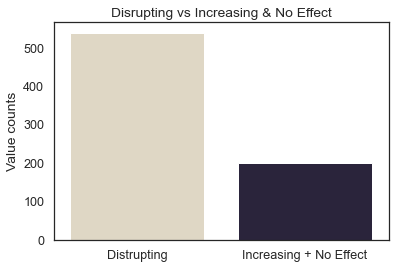

In [33]:
visualize_label_counts(data_processed)

In [34]:
display_label_counts(data_processed)

,Mutation_Effect_Label,Counts
Disrupting,0,540
Increasing + No Effect,1,200


## Data Creation with Unique Proteins

Here, we desire training data to have one occurance of each protein in `UniProt_ID` column.

In [35]:
# Get the unique proteins from `UniProt_ID` column.
unique_proteins = list(data_processed['UniProt_ID'].unique())

# Number of unique_proteins
print('Number of `unique_proteins`:', len(unique_proteins))

# First five proteins
print(unique_proteins[:5])

Number of `unique_proteins`: 164
['Q9BPZ3', 'P01116', 'Q96QK1', 'O43521-3', 'Q13418']


There are $164$ unique proteins in `UniProt_ID` column. Now, we will re-construct the training data where it will have $164$ rows, i.e. one row for each unique protein. In the case where multiple row option possible, we randomly select one.

In [36]:
sampled_row_dataframes = []
for unique_protein in unique_proteins:
    sampled_row_dataframes.append(data_processed[data_processed['UniProt_ID'] == unique_protein].sample())

In [37]:
# Merge row dataframes into single dataframe, stack rows on top of each other.
sampled_train_data = pd.concat(sampled_row_dataframes)

# Reset index of the dataframe to avoid any possible errors
sampled_train_data.reset_index(drop=True, inplace=True)

# Dimensions of dataframe
print_annotation(f"Dimensions of sampled_dataframe: {sampled_train_data.shape}")

# First five entries
sampled_train_data.head()


Dimensions of sampled_dataframe: (164, 62)
------------------------------------------


,Mutation_Effect_Label,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,0,Q9BPZ3,F118A,P11940,1.0000,1.000000,1.0000,0.968750,1.219700,-0.092273,...,118.0,5.30636,3.79101,52.4675,52.4675,427.775,194.715,622.495,3.35293,3.35293
1,0,P01116,E37G,P50749,0.9277,0.931315,0.3553,0.172500,2.470580,0.999487,...,329.0,45.03130,44.51690,70.2449,70.2449,464.470,400.030,864.505,2.63614,3.21798
2,0,Q96QK1,F534D,Q9UBQ0,1.0000,0.360743,1.0000,0.994505,2.695710,0.288297,...,453.0,68.21080,68.19710,59.2321,59.1774,510.690,298.820,809.510,3.03938,3.24435
3,0,O43521-3,G66A,P10415,0.8077,0.607148,0.4611,0.457246,0.510358,-0.044520,...,229.0,5.88486,6.57183,93.3738,93.3738,414.305,244.975,659.285,3.55303,3.19191
4,1,Q13418,Q362H,Q9NVD7,0.9925,0.971054,1.0000,0.961240,0.621791,0.206189,...,391.0,60.07690,60.06430,33.8017,33.8017,406.135,174.195,580.330,3.39874,3.39874


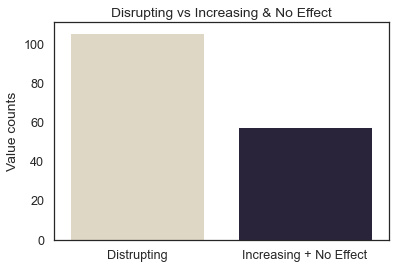

In [38]:
visualize_label_counts(sampled_train_data)

In [39]:
display_label_counts(sampled_train_data)

,Mutation_Effect_Label,Counts
Disrupting,0,106
Increasing + No Effect,1,58


## Prepare the Train Data for Machine Learning Algorithms

Remove "_UniProt_ID_", "_Mutation_", "_Interactor_UniProt_ID_" columns, since they are not feature columns.

In [40]:
sampled_train_data = sampled_train_data.drop(["UniProt_ID", "Mutation", "Interactor_UniProt_ID"], axis='columns')

### Shuffle the data

In [41]:
# Shuffle the rows in data_prepared:
data_prepared = sampled_train_data.sample(frac=1, random_state=42).reset_index(drop=True).copy()

### Train and Validation variables

Splitting `data_prepared` into training set and validation set using random splitting:

In [42]:
from sklearn.model_selection import train_test_split

random_train_set, random_valid_set = train_test_split(
    data_prepared, test_size=0.2, random_state=42)

print(random_train_set.shape, random_valid_set.shape)

(131, 59) (33, 59)


In [43]:
random_train_set.head()

,Mutation_Effect_Label,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,ProteinSolver_score,EL2_score,Model/DOPE_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
84,0,0.9793,0.980335,0.9892,0.989740,2.162030,0.935388,0.036409,1.474064,-0.526133,...,286.0,42.4183,42.0285,23.9128,23.9128,174.750,123.920,298.67,2.55760,6.60322
2,1,0.9907,0.972978,0.6777,0.650644,2.374050,0.000000,0.000000,0.000000,-0.915360,...,433.0,55.8168,55.8453,55.3707,55.3707,325.425,218.695,544.12,3.38398,3.38398
94,1,0.5789,0.562921,0.8776,0.883720,0.612743,0.951992,-0.043527,1.566820,-1.625160,...,223.0,29.1359,29.2757,20.6334,20.6334,380.390,275.300,655.69,3.48052,3.48052
45,0,1.0000,0.982405,0.2900,0.262453,1.846540,0.987766,0.103526,1.484753,-0.488895,...,550.0,88.8528,88.7118,168.5320,168.5320,669.335,393.660,1062.99,2.37708,2.37708
42,1,0.2604,0.269226,0.2258,0.196466,3.277060,0.430199,0.046808,-0.034091,0.821761,...,447.0,117.5370,117.4680,264.3780,264.3780,242.070,264.880,506.95,5.14752,6.48977


Splitting `train_data` into training set and validation set using stratified random splitting, we get something like (with `random_state=42` in shuffle):
```python
>>> train_index
array([84, 2, 94, 45, 42], dtype=int64)
```
**Note:** Due to the shuffling, it may change when different `random_state` is provided in shuffling.

StratifiedShuffleSplit and StratifiedKFold returns the *different* permutation of numbers. The following cell contains `n_splits=1`, meaning that it is used for generation of a sequence of numbers in a random order.

In [44]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, valid_index in split.split(data_prepared, data_prepared["Mutation_Effect_Label"]):
    strat_train_set = data_prepared.iloc[train_index]
    strat_valid_set = data_prepared.iloc[valid_index]

In [45]:
train_index[:5]

array([ 72,   4,  18, 103,  80], dtype=int64)

In [46]:
strat_train_set.head()

,Mutation_Effect_Label,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,ProteinSolver_score,EL2_score,Model/DOPE_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
72,0,0.9846,0.985370,0.9945,0.948145,1.701400,0.529685,0.651661,2.079908,-0.568386,...,249.0,11.2322,10.9007,66.93740,66.93740,319.805,213.915,533.725,2.68148,5.65404
4,1,1.0000,0.839604,1.0000,0.691176,-0.160301,0.958911,0.070774,0.711845,-1.648720,...,471.0,109.9170,109.8100,4.89037,4.89037,989.010,745.090,1734.100,2.80591,2.80591
18,0,0.3504,0.261259,0.9272,0.713486,0.408782,0.504724,0.503103,0.479929,-1.172420,...,344.0,93.6050,92.5657,45.27760,45.27760,0.000,0.000,0.000,3.45208,3.62286
103,0,0.9012,0.843648,1.0000,0.951807,2.661090,0.991246,0.023728,2.252292,-1.666830,...,161.0,16.0402,16.0921,21.73500,21.73500,1078.670,479.795,1558.460,2.66772,2.66772
80,1,0.2886,0.273229,0.2830,0.190818,0.761459,0.093737,0.001019,-0.742759,0.950093,...,527.0,348.3130,348.2240,214.48200,214.48200,0.000,0.000,0.000,4.90623,4.90623


In [47]:
strat_train_set.shape, strat_valid_set.shape

((131, 59), (33, 59))

In [48]:
def label_proportions(data_param):
    return data_param["Mutation_Effect_Label"].value_counts() / len(data_param)

compare_props = pd.DataFrame({
    "Overall": label_proportions(data_prepared),
    "Stratified": label_proportions(strat_valid_set),
    "Random": label_proportions(random_valid_set)
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
compare_props.rename(index={0: 'Disruptive', 1: 'Increasing + No Effect'}, inplace=True)
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
Disruptive,0.646341,0.636364,0.666667,3.144654,-1.543739
Increasing + No Effect,0.353659,0.363636,0.333333,-5.747126,2.821317


Splitting data randomly results in representativeness error, therefore, `strat_train_set` and `strat_valid_set` can be used.

### Declare `X_train`, `y_train`, `X_valid`, `y_valid`

In [49]:
# All data, i.e. data_prepared
X = data_prepared.drop(["Mutation_Effect_Label"], axis="columns")
y = data_prepared["Mutation_Effect_Label"].copy()

In [50]:
# Stratified version
X_train = strat_train_set.drop(["Mutation_Effect_Label"], axis="columns")
y_train = strat_train_set["Mutation_Effect_Label"].copy()
X_valid = strat_valid_set.drop(["Mutation_Effect_Label"], axis="columns")
y_valid = strat_valid_set["Mutation_Effect_Label"].copy()
# Printing their shapes
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(131, 58) (131,)
(33, 58) (33,)


In [51]:
# Randomized version
X_train_random = random_train_set.drop(["Mutation_Effect_Label"], axis="columns")
y_train_random = random_train_set["Mutation_Effect_Label"].copy()
X_valid_random = random_valid_set.drop(["Mutation_Effect_Label"], axis="columns")
y_valid_random = random_valid_set["Mutation_Effect_Label"].copy()
# Printing their shapes
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(131, 58) (131,)
(33, 58) (33,)


# Prediction of Mutation Effect

# Machine Learning Utils

In [52]:
# Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from itertools import combinations
import seaborn as sns

In [53]:
def cross_validation_options(cv_option_param, n_jobs_param=-1):
    """
    A helper function that returns (my) desired cv_option and n_jobs.
    """
    
    # Options for cross-validation cv= parameter.
    if isinstance(cv_option_param, int):
        cv_option_param = cv_option_param
    elif cv_option_param == "skf_5":
        cv_option_param = StratifiedKFold(shuffle=True, n_splits=5)
    elif cv_option_param == "skf_10":
        cv_option_param = StratifiedKFold(shuffle=True, n_splits=10)
    elif cv_option_param == "kf_5":
        cv_option_param = KFold(shuffle=True, n_splits=5)
    elif cv_option_param == "kf_10":
        cv_option_param = KFold(shuffle=True, n_splits=10)
    else:
        raise ValueError("cv_option value error!")
    
    return cv_option_param, n_jobs_param

# Classification: Initial Insights

In [54]:
attributes = list(X.columns)

# Plotting feature importance in barplot
def plot_feature_importances(feature_importances):
    feature_imp_series = pd.Series(feature_importances,
                               index = attributes).sort_values(ascending=False)

    plt.figure(figsize=(5, 20))
    sns.set(style="white", font_scale=1.15)  # white, dark, whitegrid, darkgrid, ticks
    sns.barplot(x=feature_imp_series, y=feature_imp_series.index, palette="ch:s=-.2,r=.6")
    plt.xlabel('Feature Importance Scores')
    plt.ylabel('Variables')
    plt.title('Feature Importances')
    plt.show()
    
    
# Plotting top n feature importance in barplot
def plot_top_feature_importances(feature_importances, top_n=10, figsize=None):
    feature_imp_series = pd.Series(feature_importances,
                               index = attributes).sort_values(ascending=False)
    
    figsize = (5 , top_n//3) if not figsize else (5, 5)
    
    sns.set(style="white", font_scale=1.15)  # white, dark, whitegrid, darkgrid, ticks
    feature_imp_series_top_n = feature_imp_series[:top_n]
    plt.figure(figsize=figsize)
    sns.barplot(x=feature_imp_series_top_n, y=feature_imp_series_top_n.index, palette="ch:s=-.2,r=.6")
    plt.xlabel('Feature Importance Scores')
    plt.ylabel('Variables')
    plt.title('Feature Importances (top {})'.format(top_n))
    plt.show()

### Initial Scoring

In [55]:
# Initial scoring: X_train, y_train with prediction of X_valid
forest_clf_inital = RandomForestClassifier(random_state=42)

forest_clf_inital.fit(X_train, y_train)

forest_predictions = forest_clf_inital.predict(X_valid)

print("Balanced accuracy score : {:.4f}".format(balanced_accuracy_score(y_valid, forest_predictions)))
print("Accuracy score\t\t: {:.4f}".format(accuracy_score(y_valid, forest_predictions)))

Balanced accuracy score : 0.5774
Accuracy score		: 0.6667


### Initial Feature Importance

In [56]:
attributes = list(X.columns)

In [57]:
# plot_feature_importances(forest_clf_inital.feature_importances_)

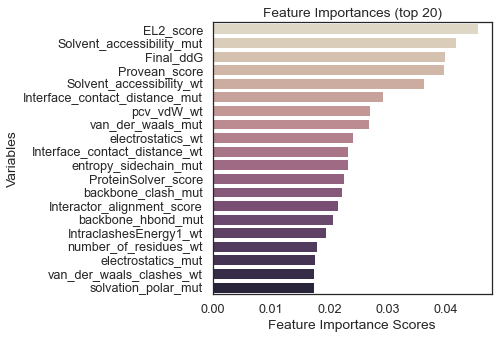

In [58]:
plot_top_feature_importances(forest_clf_inital.feature_importances_, top_n=20, 
                             figsize=(5,5))

In [59]:
forest_clf_inital.feature_importances_

array([0.01064639, 0.01455221, 0.0135806 , 0.02154391, 0.03988019,
       0.01530553, 0.02246858, 0.04551391, 0.00919255, 0.03963889,
       0.00928708, 0.03625566, 0.04170377, 0.02703914, 0.01101024,
       0.0155544 , 0.01010345, 0.00895466, 0.01530176, 0.01612028,
       0.01387346, 0.0240038 , 0.01684732, 0.01234024, 0.01740669,
       0.01693251, 0.01399298, 0.01030392, 0.0108907 , 0.01197551,
       0.01214422, 0.00588653, 0.01784646, 0.01524765, 0.02063438,
       0.0133245 , 0.02685635, 0.0175727 , 0.01730106, 0.0134693 ,
       0.0127356 , 0.02317537, 0.00762953, 0.01505969, 0.02223586,
       0.00861884, 0.01291071, 0.00996276, 0.00970063, 0.01941687,
       0.01237777, 0.01480279, 0.01447745, 0.01396487, 0.01144997,
       0.00666669, 0.023178  , 0.02913313])

In [60]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.argpartition(np.array(arr), -k)[-k:][::-1]

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X.iloc[:, self.feature_indices_]


In [61]:
tfs = TopFeatureSelector(forest_clf_inital.feature_importances_, 20)

In [62]:
[feature for score, feature in sorted(zip(forest_clf_inital.feature_importances_, attributes), reverse=True)[:15]]

['EL2_score',
 'Solvent_accessibility_mut',
 'Final_ddG',
 'Provean_score',
 'Solvent_accessibility_wt',
 'Interface_contact_distance_mut',
 'pcv_vdW_wt',
 'van_der_waals_mut',
 'electrostatics_wt',
 'Interface_contact_distance_wt',
 'entropy_sidechain_mut',
 'ProteinSolver_score',
 'backbone_clash_mut',
 'Interactor_alignment_score',
 'backbone_hbond_mut']

In [63]:
# X = TopFeatureSelector(forest_clf_inital.feature_importances_, k=15).fit_transform(X)
# X.head()

In [64]:
sorted(zip(forest_clf_inital.feature_importances_, attributes), reverse=True)[:15]

[(0.04551390948415583, 'EL2_score'),
 (0.04170377062534037, 'Solvent_accessibility_mut'),
 (0.039880194632241586, 'Final_ddG'),
 (0.03963888928114581, 'Provean_score'),
 (0.036255656287518326, 'Solvent_accessibility_wt'),
 (0.02913312645484658, 'Interface_contact_distance_mut'),
 (0.027039140734088328, 'pcv_vdW_wt'),
 (0.026856350504874903, 'van_der_waals_mut'),
 (0.024003799438946635, 'electrostatics_wt'),
 (0.02317800282820989, 'Interface_contact_distance_wt'),
 (0.02317537085790828, 'entropy_sidechain_mut'),
 (0.02246858071177121, 'ProteinSolver_score'),
 (0.022235856964691735, 'backbone_clash_mut'),
 (0.021543908456212547, 'Interactor_alignment_score'),
 (0.020634375907106442, 'backbone_hbond_mut')]

In [65]:
[feature for score, feature in sorted(zip(forest_clf_inital.feature_importances_, attributes), reverse=True)[:15]]

['EL2_score',
 'Solvent_accessibility_mut',
 'Final_ddG',
 'Provean_score',
 'Solvent_accessibility_wt',
 'Interface_contact_distance_mut',
 'pcv_vdW_wt',
 'van_der_waals_mut',
 'electrostatics_wt',
 'Interface_contact_distance_wt',
 'entropy_sidechain_mut',
 'ProteinSolver_score',
 'backbone_clash_mut',
 'Interactor_alignment_score',
 'backbone_hbond_mut']

In [66]:
top_20_features = [feature for score, feature in sorted(zip(forest_clf_inital.feature_importances_, attributes), reverse=True)[:20]]
top_20_features

['EL2_score',
 'Solvent_accessibility_mut',
 'Final_ddG',
 'Provean_score',
 'Solvent_accessibility_wt',
 'Interface_contact_distance_mut',
 'pcv_vdW_wt',
 'van_der_waals_mut',
 'electrostatics_wt',
 'Interface_contact_distance_wt',
 'entropy_sidechain_mut',
 'ProteinSolver_score',
 'backbone_clash_mut',
 'Interactor_alignment_score',
 'backbone_hbond_mut',
 'IntraclashesEnergy1_wt',
 'number_of_residues_wt',
 'electrostatics_mut',
 'van_der_waals_clashes_wt',
 'solvation_polar_mut']

# Classification

## Initial Insights

In [67]:
# Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [68]:
feature_columns = list(data_prepared.columns)[1:]

# Plotting feature importance in barplot
def plot_feature_importances(feature_importances):
    attributes = feature_columns
    feature_imp_series = pd.Series(feature_importances,
                               index = attributes).sort_values(ascending=False)

    plt.figure(figsize=(5, 20))
    sns.set(style="white", font_scale=1.15)  # white, dark, whitegrid, darkgrid, ticks
    sns.barplot(x=feature_imp_series, y=feature_imp_series.index, palette="ch:s=-.2,r=.6")
    plt.xlabel('Feature Importance Scores')
    plt.ylabel('Variables')
    plt.title('Feature Importances')
    plt.show()
    
    
# Plotting top n feature importance in barplot
def plot_top_feature_importances(feature_importances, top_n=10, figsize=None):
    attributes = feature_columns
    feature_imp_series = pd.Series(feature_importances,
                               index = attributes).sort_values(ascending=False)
    
    figsize = (5 , top_n//3) if not figsize else (5, 5)
    
    sns.set(style="white", font_scale=1.15)  # white, dark, whitegrid, darkgrid, ticks
    feature_imp_series_top_n = feature_imp_series[:top_n]
    plt.figure(figsize=figsize)
    sns.barplot(x=feature_imp_series_top_n, y=feature_imp_series_top_n.index, palette="ch:s=-.2,r=.6")
    plt.xlabel('Feature Importance Scores')
    plt.ylabel('Variables')
    plt.title('Feature Importances (top {})'.format(top_n))
    plt.show()

In [69]:
# Initial scoring: X_train, y_train with prediction of X_valid
forest_clf_inital = RandomForestClassifier(random_state=42)

forest_clf_inital.fit(X_train, y_train)

forest_predictions = forest_clf_inital.predict(X_valid)

print("Balanced accuracy score : {:.4f}".format(balanced_accuracy_score(y_valid, forest_predictions)))
print("Accuracy score\t\t: {:.4f}".format(accuracy_score(y_valid, forest_predictions)))

Balanced accuracy score : 0.5774
Accuracy score		: 0.6667


In [70]:
def evaluate_cross_val(X_train_param, y_train_param, cv_option_param):
        
    # Cross Validation options
    cv_option, n_jobs = cross_validation_options(cv_option_param, -1)
    
    # Model
    forest_clf = RandomForestClassifier(random_state=42)
    
    # Cross-validation Accuracy and Balanced Accuracy Scores
    forest_scores_bas = cross_val_score(forest_clf, 
                                        X_train_param, y_train_param,
                                        cv=cv_option, scoring="balanced_accuracy", n_jobs=n_jobs)

    forest_scores_as = cross_val_score(forest_clf, 
                                       X_train_param, y_train_param,
                                       cv=cv_option, scoring="accuracy", n_jobs=n_jobs)
    
    # Print scores and averages
    print("Balanced accuracy score AVG : {:.4f}".format(forest_scores_bas.mean()))
#     print(forest_scores_bas)
    print("Accuracy score AVG          : {:.4f}".format(forest_scores_as.mean()))
#     print(forest_scores_as)

In [71]:
evaluate_cross_val(X, y, "skf_10")

Balanced accuracy score AVG : 0.6374
Accuracy score AVG          : 0.7364


In [72]:
evaluate_cross_val(X, y, "skf_10")

Balanced accuracy score AVG : 0.6244
Accuracy score AVG          : 0.7371


In [73]:
evaluate_cross_val(X, y, "skf_10")

Balanced accuracy score AVG : 0.6661
Accuracy score AVG          : 0.7066


In [74]:
evaluate_cross_val(X_train, y_train, "skf_5")

Balanced accuracy score AVG : 0.6847
Accuracy score AVG          : 0.7399


In [75]:
evaluate_cross_val(X, y, "skf_10")

Balanced accuracy score AVG : 0.6873
Accuracy score AVG          : 0.7077


In [76]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import seaborn as sns

def cross_val_confusion_matrix_via(model_param, X_train_param, y_train_param,
                                   return_report=False):
    
    skf = StratifiedKFold(shuffle=True, n_splits=10)
    y_pred_temp = cross_val_predict(model_param, X_train_param, y_train_param, cv=skf)
    
    label_names = ["Disrupting", "NoEffect+Increasing"]
       
    sns.heatmap(confusion_matrix(y_train_param, y_pred_temp), annot=True, fmt="d", xticklabels=label_names, yticklabels=label_names)
    plt.title(r'$\mathbf{Confusion\ Matrix}$', fontsize=16, fontweight='bold')
    plt.ylabel('Actual', fontsize=16, fontweight='bold')
    plt.xlabel('Predicted', fontsize=16, fontweight='bold')
    plt.show()
    
    if return_report:
        print(classification_report(y_train_param, y_pred_temp, target_names=label_names))
  

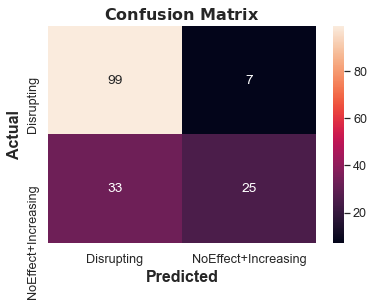

                     precision    recall  f1-score   support

         Disrupting       0.75      0.93      0.83       106
NoEffect+Increasing       0.78      0.43      0.56        58

           accuracy                           0.76       164
          macro avg       0.77      0.68      0.69       164
       weighted avg       0.76      0.76      0.73       164



In [77]:
cross_val_confusion_matrix_via(RandomForestClassifier(random_state=42),
                               X, y, return_report=True)

## Shap Waterfall

In [78]:
# Import the package
import shap
shap.initjs()

In [79]:
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

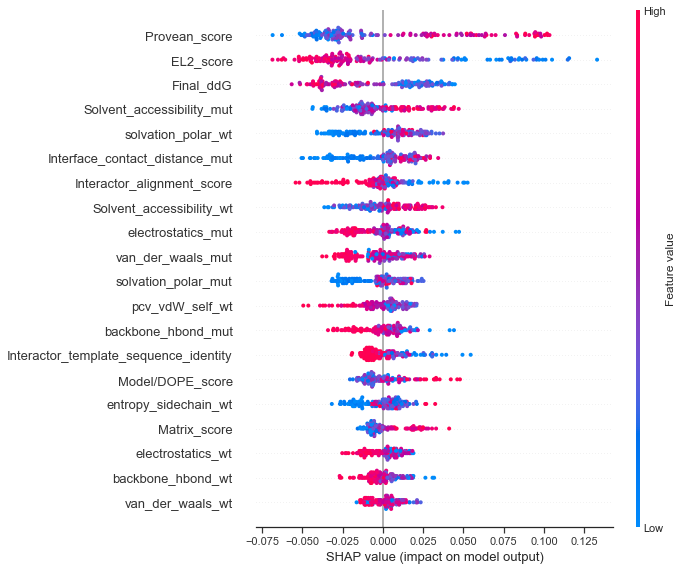

In [80]:
# Let us have a look on SHAP summary plot
samples = X

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(samples, approximate=False, check_additivity=False)

shap.summary_plot(shap_values[1], samples)

In [81]:
def make_shap_waterfall_plot(shap_values, features, num_display=20):
    column_list = features.columns
    feature_ratio = (np.abs(shap_values).sum(0) / np.abs(shap_values).sum()) * 100
    column_list = column_list[np.argsort(feature_ratio)[::-1]]
    feature_ratio_order = np.sort(feature_ratio)[::-1]
    cum_sum = np.cumsum(feature_ratio_order)
    column_list = column_list[:num_display]
    feature_ratio_order = feature_ratio_order[:num_display]
    cum_sum = cum_sum[:num_display]
    
    num_height = 0
    if (num_display >= 20) & (len(column_list) >= 20):
        num_height = (len(column_list) - 20) * 0.4
        
    fig, ax1 = plt.subplots(figsize=(8, 8 + num_height))
    ax1.plot(cum_sum[::-1], column_list[::-1], c='blue', marker='o')
    ax2 = ax1.twiny()
    ax2.barh(column_list[::-1], feature_ratio_order[::-1], alpha=0.6)
    
    ax1.grid(True)
    ax2.grid(False)
    ax1.set_xticks(np.arange(0, round(cum_sum.max(), -1)+1, 10))
    ax2.set_xticks(np.arange(0, round(feature_ratio_order.max(), -1)+1, 10))
    ax1.set_xlabel('Cumulative Ratio')
    ax2.set_xlabel('Composition Ratio')
    ax1.tick_params(axis="y", labelsize=13)
    plt.ylim(-1, len(column_list))
    print(list(column_list))


['Provean_score', 'EL2_score', 'Final_ddG', 'Solvent_accessibility_mut', 'solvation_polar_wt', 'Interface_contact_distance_mut', 'Interactor_alignment_score', 'Solvent_accessibility_wt', 'electrostatics_mut', 'van_der_waals_mut', 'solvation_polar_mut']


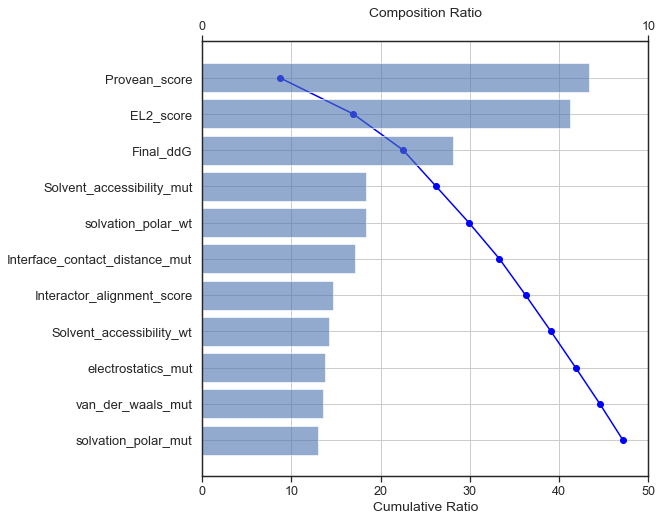

In [82]:
# Shap waterfall plot
make_shap_waterfall_plot(shap_values[1], samples, num_display=11)

## Feature Selection

In [83]:
shap_top_6 = ['Provean_score', 'EL2_score', 'Final_ddG', 'Solvent_accessibility_mut', 'solvation_polar_wt', 'Interface_contact_distance_mut']
shap_top_11 = ['Provean_score', 'EL2_score', 'Final_ddG', 'Solvent_accessibility_mut', 'solvation_polar_wt', 'Interface_contact_distance_mut', 'Interactor_alignment_score', 'Solvent_accessibility_wt', 'electrostatics_mut', 'van_der_waals_mut', 'solvation_polar_mut']

In [84]:
X_shap_top_6 = X[shap_top_6]
X_shap_top_11 = X[shap_top_11]

### Confusion Matrices

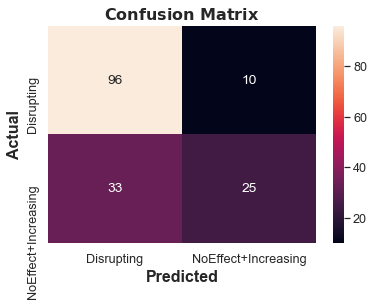

                     precision    recall  f1-score   support

         Disrupting       0.74      0.91      0.82       106
NoEffect+Increasing       0.71      0.43      0.54        58

           accuracy                           0.74       164
          macro avg       0.73      0.67      0.68       164
       weighted avg       0.73      0.74      0.72       164



In [85]:
# X
cross_val_confusion_matrix_via(RandomForestClassifier(random_state=42),
                               X, y, return_report=True)

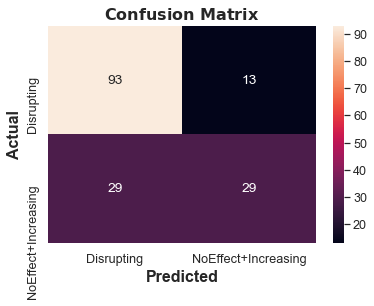

                     precision    recall  f1-score   support

         Disrupting       0.76      0.88      0.82       106
NoEffect+Increasing       0.69      0.50      0.58        58

           accuracy                           0.74       164
          macro avg       0.73      0.69      0.70       164
       weighted avg       0.74      0.74      0.73       164



In [86]:
# X_shap_top_6
cross_val_confusion_matrix_via(RandomForestClassifier(random_state=42),
                               X_shap_top_6, y, return_report=True)

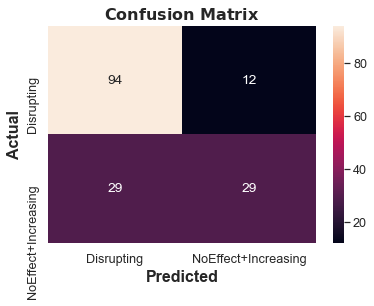

                     precision    recall  f1-score   support

         Disrupting       0.76      0.89      0.82       106
NoEffect+Increasing       0.71      0.50      0.59        58

           accuracy                           0.75       164
          macro avg       0.74      0.69      0.70       164
       weighted avg       0.74      0.75      0.74       164



In [87]:
# X_shap_top_11
cross_val_confusion_matrix_via(RandomForestClassifier(random_state=42),
                               X_shap_top_11, y, return_report=True)

### Cross Val Scores

In [88]:
evaluate_cross_val(X, y, "skf_5")

Balanced accuracy score AVG : 0.6689
Accuracy score AVG          : 0.6831


In [89]:
evaluate_cross_val(X_shap_top_6, y, "skf_10")

Balanced accuracy score AVG : 0.6511
Accuracy score AVG          : 0.7574


In [90]:
evaluate_cross_val(X_shap_top_11, y, "skf_10")

Balanced accuracy score AVG : 0.7015
Accuracy score AVG          : 0.7298


# Fine Tuning

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [92]:
X_train_shap_top_6 = X_train[shap_top_6]
X_train_shap_top_11 = X_train[shap_top_11]

X_valid_shap_top_6 = X_valid[shap_top_6]
X_valid_shap_top_11 = X_valid[shap_top_11]

In [93]:
def plot_top_feature_importances_final(feature_importances, attributes_param, top_n=10, figsize=None):
    feature_imp_series = pd.Series(feature_importances,
                                   index = attributes_param).sort_values(ascending=False)
    
    figsize = (5 , top_n//3) if not figsize else (5, 5)
    
    sns.set(style="white", font_scale=1.15)  # white, dark, whitegrid, darkgrid, ticks
    feature_imp_series_top_n = feature_imp_series[:top_n]
    plt.figure(figsize=figsize)
    sns.barplot(x=feature_imp_series_top_n, y=feature_imp_series_top_n.index, palette="ch:s=-.2,r=.6")
    plt.xlabel('Feature Importance Scores')
    plt.ylabel('Variables')
    plt.title('Feature Importances (top {})'.format(top_n))
    plt.show()

In [94]:
param_grid_randomized  = {'bootstrap': [True, False],
                          'max_depth': [2, 3, 4, 5, 7, 10, 20, 30, 40, 50, 75, 100],
                          'max_features': ['auto', 'sqrt'],
                          'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
                         
forest_clf = RandomForestClassifier(random_state=42)

randomized_search = RandomizedSearchCV(forest_clf, param_grid_randomized, n_iter=10,
                                       random_state=42,    
                                       cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=42), 
                                       scoring='balanced_accuracy', 
                                       return_train_score=True, n_jobs=-1, verbose=2)

randomized_search.fit(X_train_shap_top_11, y_train)
randomized_search.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 1600,
 'max_features': 'sqrt',
 'max_depth': 3,
 'bootstrap': False}

In [95]:
randomized_search.best_score_

0.7447222222222223

In [96]:
final_model = randomized_search.best_estimator_
final_model

RandomForestClassifier(bootstrap=False, max_depth=3, max_features='sqrt',
                       n_estimators=1600, random_state=42)

RandomForestClassifier(bootstrap=False, max_depth=3, max_features='sqrt',
                       n_estimators=1600, random_state=42)

# Final Evalution

**Default Model with `X_train`**

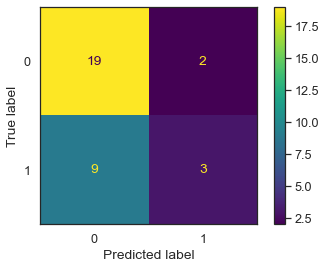

Balanced accuracy score : 0.5774
Accuracy score		: 0.6667


In [97]:
# Final scoring comparison: X_train, y_train with prediction of X_valid
forest_clf = RandomForestClassifier(random_state=42)

forest_clf.fit(X_train, y_train)

forest_predictions = forest_clf.predict(X_valid)

plot_confusion_matrix(forest_clf, X_valid, y_valid)
plt.show()

print("Balanced accuracy score : {:.4f}".format(balanced_accuracy_score(y_valid, forest_predictions)))
print("Accuracy score\t\t: {:.4f}".format(accuracy_score(y_valid, forest_predictions)))

**Default Model with `X_train_shap_top_11`**

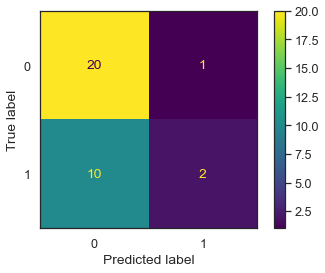

Balanced accuracy score : 0.5595
Accuracy score		: 0.6667


In [98]:
# Final scoring comparison: X_train_shap_top_11, y_train with prediction of X_valid_shap_top_11
forest_clf = RandomForestClassifier(random_state=42)

forest_clf.fit(X_train_shap_top_11, y_train)

forest_predictions = forest_clf.predict(X_valid_shap_top_11)

plot_confusion_matrix(forest_clf, X_valid_shap_top_11, y_valid)
plt.show()

print("Balanced accuracy score : {:.4f}".format(balanced_accuracy_score(y_valid, forest_predictions)))
print("Accuracy score\t\t: {:.4f}".format(accuracy_score(y_valid, forest_predictions)))

**Hyper-param Tuned Model with `X_train_shap_top_11`**

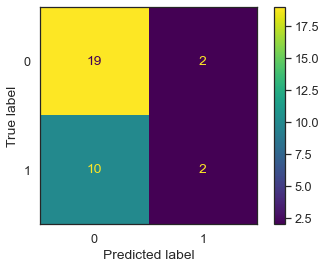

Balanced accuracy score : 0.5357
Accuracy score		: 0.6364


In [99]:
# Final scoring comparison: X_train_shap_top_11, y_train with prediction of X_valid_shap_top_11
forest_clf = randomized_search.best_estimator_

forest_clf.fit(X_train_shap_top_11, y_train)

forest_predictions = forest_clf.predict(X_valid_shap_top_11)

plot_confusion_matrix(forest_clf, X_valid_shap_top_11, y_valid)
plt.show()

print("Balanced accuracy score : {:.4f}".format(balanced_accuracy_score(y_valid, forest_predictions)))
print("Accuracy score\t\t: {:.4f}".format(accuracy_score(y_valid, forest_predictions)))

In [100]:
def evaluate_cross_val_avg_via(model_param, X_train_param, y_train_param,
                               plot_param=True, repeation_param=3):
    
    # Options for cross-validation cv= parameter.
    cv_option, n_jobs = cross_validation_options("skf_10", -1)
    repeation=repeation_param
    
    forest_scores_bas, forest_scores_as = [], []
    
    for i in range(repeation):
        
        # Cross-validation Accuracy and Balanced Accuracy Scores
        forest_scores_bas.append(cross_val_score(model_param, 
                                            X_train_param, y_train_param,
                                            cv=cv_option, 
                                            scoring="balanced_accuracy", n_jobs=n_jobs))

        forest_scores_as.append(cross_val_score(model_param, 
                                           X_train_param, y_train_param,
                                           cv=cv_option, 
                                           scoring="accuracy", n_jobs=n_jobs))

        # # Print scores and averages
        # print("Balanced accuracy score AVG : {:.4f}".format(forest_scores_bas[i].mean()))
        # print("Accuracy score AVG          : {:.4f}".format(forest_scores_as[i].mean()))
        
    if plot_param:
        plt.plot(range(1, len(forest_scores_as) + 1), np.array(forest_scores_as).mean(axis=1), "+", color='#265191', alpha=0.5, label="Accuracy_Scores")
        plt.plot(range(1, len(forest_scores_bas) + 1), np.array(forest_scores_bas).mean(axis=1), ".", color='#9F2945', alpha=0.5, label="Balanced_Accuracy_Scores")

        plt.ylim(0.50, 1)
        plt.xticks(range(1, repeation_param + 1))
        plt.legend()
        plt.xlabel("Repetitions")
        plt.ylabel("Scores AVG")
        plt.title("Accuracy and Balanced Accuracy AVG Scores per Repetition")
        plt.show();

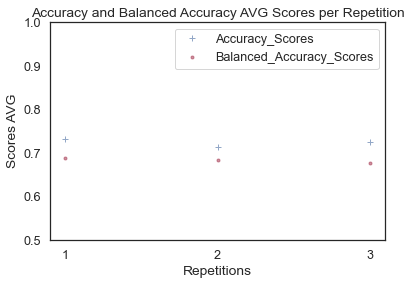

In [101]:
evaluate_cross_val_avg_via(randomized_search.best_estimator_, X, y)

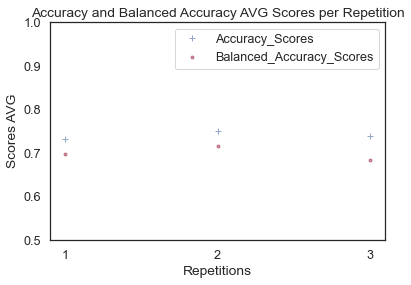

In [102]:
evaluate_cross_val_avg_via(randomized_search.best_estimator_, X_shap_top_6, y)

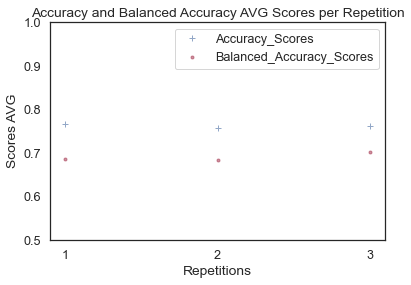

In [103]:
evaluate_cross_val_avg_via(randomized_search.best_estimator_, X_shap_top_11, y)

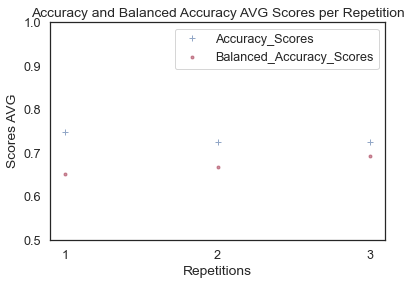

In [104]:
evaluate_cross_val_avg_via(RandomForestClassifier(), X, y)

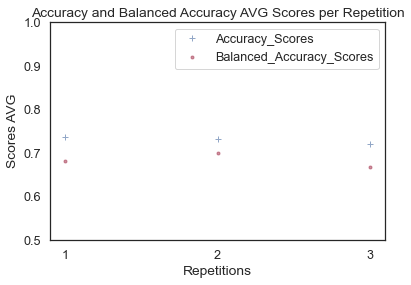

In [105]:
evaluate_cross_val_avg_via(RandomForestClassifier(), X_shap_top_6, y)

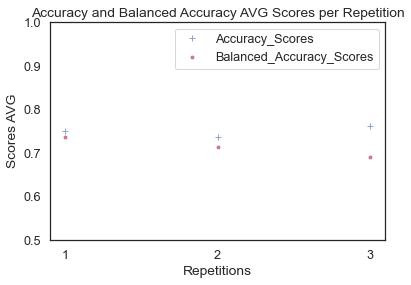

In [106]:
evaluate_cross_val_avg_via(RandomForestClassifier(), X_shap_top_11, y)

## Final Models

# **CHECK HERE???** **CHECK HERE???** **CHECK HERE???** **CHECK HERE???** **CHECK HERE???**

Looks like using default parameters yields better results.

**Model I: ???**

In [107]:
final_model_randomized = randomized_search.best_estimator_

In [108]:
balanced_accuracy_score(y_valid, final_model_randomized.predict(X_valid_shap_top_11))

0.5357142857142857

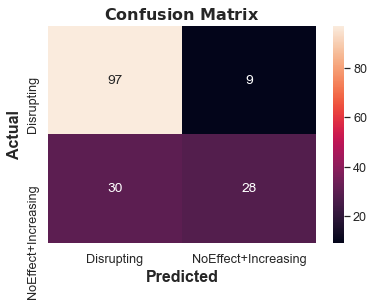

                     precision    recall  f1-score   support

         Disrupting       0.76      0.92      0.83       106
NoEffect+Increasing       0.76      0.48      0.59        58

           accuracy                           0.76       164
          macro avg       0.76      0.70      0.71       164
       weighted avg       0.76      0.76      0.75       164



In [109]:
# X_shap_top_11
cross_val_confusion_matrix_via(final_model_randomized,
                               X_shap_top_11, y, return_report=True)

**Model II: *RandomForestClassifier* fitted with train set**

In [110]:
model_forest_ii = RandomForestClassifier(random_state=42)

model_forest_ii.fit(X_train_shap_top_11, y_train)

balanced_accuracy_score(y_valid, model_forest_ii.predict(X_valid_shap_top_11))

0.5595238095238095

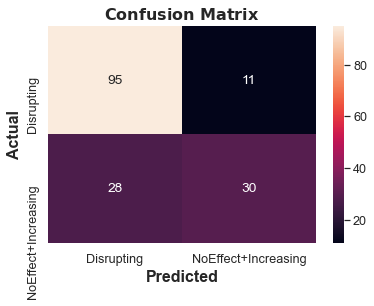

                     precision    recall  f1-score   support

         Disrupting       0.77      0.90      0.83       106
NoEffect+Increasing       0.73      0.52      0.61        58

           accuracy                           0.76       164
          macro avg       0.75      0.71      0.72       164
       weighted avg       0.76      0.76      0.75       164



In [111]:
# X_shap_top_11
cross_val_confusion_matrix_via(RandomForestClassifier(random_state=42),
                               X_shap_top_11, y, return_report=True)

**Model III: *RandomForestClassifier* fitted with whole train data**

In [112]:
final_model_forest = RandomForestClassifier(random_state=42)

final_model_forest.fit(X_shap_top_11, y)

RandomForestClassifier(random_state=42)

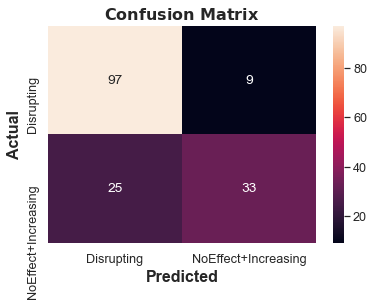

                     precision    recall  f1-score   support

         Disrupting       0.80      0.92      0.85       106
NoEffect+Increasing       0.79      0.57      0.66        58

           accuracy                           0.79       164
          macro avg       0.79      0.74      0.76       164
       weighted avg       0.79      0.79      0.78       164



In [113]:
# X_shap_top_11
cross_val_confusion_matrix_via(RandomForestClassifier(random_state=42),
                               X_shap_top_11, y, return_report=True)

## Final Features and Importances

In [114]:
def plot_top_feature_importances_final(feature_importances, attributes_param):
    attributes = feature_columns
    feature_imp_series = pd.Series(feature_importances,
                                    index = attributes_param).sort_values(ascending=False)

    plt.figure(figsize=(5, 3))
    sns.set(style="white", font_scale=1.15)  # white, dark, whitegrid, darkgrid, ticks
    sns.barplot(x=feature_imp_series, y=feature_imp_series.index, palette="ch:s=-.2,r=.6")
    plt.xlabel('Feature Importances')
    plt.ylabel('Features')
    plt.title('Feature Importances of Selected Features')
    plt.show()

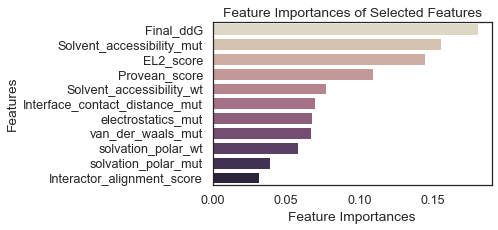

In [115]:
plot_top_feature_importances_final(randomized_search.best_estimator_.feature_importances_, X_shap_top_11.columns)

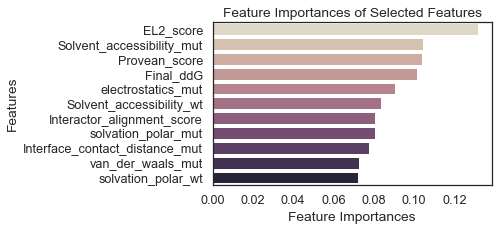

In [116]:
plot_top_feature_importances_final(final_model_forest.feature_importances_, X_shap_top_11.columns)

# Prediction on Cancer Data

## Declaring `X_brca`, `X_coad`, `X_ov`

In [117]:
selected_columns = X_shap_top_11.columns.to_list()
print(f'Number of selected columns: {len(selected_columns)}')
selected_columns

Number of selected columns: 11


['Provean_score',
 'EL2_score',
 'Final_ddG',
 'Solvent_accessibility_mut',
 'solvation_polar_wt',
 'Interface_contact_distance_mut',
 'Interactor_alignment_score',
 'Solvent_accessibility_wt',
 'electrostatics_mut',
 'van_der_waals_mut',
 'solvation_polar_mut']

**BRCA**

In [118]:
X_brca = target_brca_data[selected_columns].copy(deep=True)

print_annotation("Dataframe dimensions: {}".format(X_brca.shape))

X_brca.head(3)


Dataframe dimensions: (4452, 11)
--------------------------------


,Provean_score,EL2_score,Final_ddG,Solvent_accessibility_mut,solvation_polar_wt,Interface_contact_distance_mut,Interactor_alignment_score,Solvent_accessibility_wt,electrostatics_mut,van_der_waals_mut,solvation_polar_mut
0,-4.726,1.761235,0.730056,74.8117,67.0333,3.16742,0.936088,86.9245,-7.00494,-64.1391,66.7219
1,-4.726,1.129695,0.795178,64.0505,68.1731,4.98813,0.993160,68.1041,-12.23780,-64.9898,67.7212
2,-4.726,1.270361,1.030540,55.9307,69.1920,4.79224,0.993160,70.2800,-11.23440,-64.8110,68.8278


**COAD**

In [119]:
# X_coad = target_coad_data[selected_columns].copy(deep=True)

# print_annotation("Dataframe dimensions: {}".format(X_coad.shape))

# X_coad.head(3)

**OV**

In [120]:
# X_ov = target_ov_data[selected_columns].copy(deep=True)

# print_annotation("Dataframe dimensions: {}".format(X_ov.shape))

# X_ov.head(3)

## Predicting `BRCA`

In [121]:
brca_predictions = final_model_forest.predict(X_brca)

print_annotation("Len predictions: {}".format(len(brca_predictions))) # 4452


Len predictions: 4452
---------------------


## Predicting `COAD`

In [122]:
# coad_predictions = final_model_forest.predict(X_coad)

# print_annotation("Len predictions: {}".format(len(coad_predictions))) # 

## Predicting `OV`

In [123]:
# ov_predictions = final_model_forest.predict(X_ov)

# print_annotation("Len predictions: {}".format(len(ov_predictions))) # 

In [124]:
pd.DataFrame({
    "BRCA Predictions": pd.DataFrame({"Label_Predictions": brca_predictions}).value_counts().values
}, index=['Disrupting', 'NoEffect+Increasing'])

,BRCA Predictions
Disrupting,3065
NoEffect+Increasing,1387


In [125]:
# pd.DataFrame({
#     "COAD Predictions": pd.DataFrame({"Label_Predictions": coad_predictions}).value_counts().values
# }, index=['Disrupting', 'NoEffect+Increasing'])

In [126]:
# pd.DataFrame({
#     "OV Predictions": pd.DataFrame({"Label_Predictions": ov_predictions}).value_counts().values
# }, index=['Disrupting', 'NoEffect+Increasing'])

## Merging Predictions with SNV Data

Merge prediction column with SNV data.

In [127]:
# BRCA
# Make a copy of brca data
brca_predicted_data = brca.copy(deep=True)

# Insert prediction array values into data as first (0th) column.
brca_predicted_data.insert(0, 'Predictions', brca_predictions)

In [128]:
# # COAD
# # Make a copy of coad data
# coad_predicted_data = coad.copy(deep=True)

# # Insert prediction array values into data as first (0th) column.
# coad_predicted_data.insert(0, 'Predictions', coad_predictions)

In [129]:
# # OV
# # Make a copy of ov data
# ov_predicted_data = ov.copy(deep=True)

# # Insert prediction array values into data as first (0th) column.
# ov_predicted_data.insert(0, 'Predictions', ov_predictions)

In [130]:
len(brca_predicted_data), # len(coad_predicted_data), len(ov_predicted_data)

(4452,)

## Convert to 1-isomer: `Interactor_UniProt_ID`

$\textit{Interactor_UniProt_ID}$ column contains isomer proteins. Here, we convert them into primary representation (i.e. without dashes).

| Interactor_UniProt_ID |
--------------
| P38936     |
| P16473     |
| P16473-2   |
| P19793     |

In [131]:
def convert_primary_isomer(column_name, data):
    """
    Converts proteins into primary form representation, meaning dash-free from.
    E.g. 
        P16473-2 → P16473
    
    Parameters
    ----------
        column_name : <string>
            Name of the column where protein is stored.
        
        data : <DataFrame>
            The dataframe whose proteins will be processed in `column_name` column.
    
    Returns
    -------
        data : <DataFrame>
            Processed version of input dataframe.

    """
    
    # Protein names will be converted dashed-free version, if they contain.
    data[column_name] = data[column_name].apply(lambda x: x.split('-')[0])
    
    return data

In [132]:
# Converting proteins into primary isomer form in `Interactor_UniProt_ID` column.
brca_predicted_data = convert_primary_isomer('Interactor_UniProt_ID', brca_predicted_data)
# coad_predicted_data = convert_primary_isomer('Interactor_UniProt_ID', coad_predicted_data)
# ov_predicted_data = convert_primary_isomer('Interactor_UniProt_ID', ov_predicted_data)

## Dropping Entries which predicted as both `Decreasing` and `Increasing+NoEff`

Due to having different features from ELASPIC, the same $\textit{(protein, mutation, interactor)}$ may be classified both 0 and 1. We drop such instances.

In [133]:
def drop_invalid_predicted_entries(data):
    """
    Prediction data contains entries which for the same (PROTEIN, MUTATION, INTERACTOR), the predicted
    class is both 0 and 1. Find such instances, and drop them.
    
    Parameters
    ---------- 
        data : <DataFrame>
            The dataframe whose invalid predicted entries will be dropped.
    
    Returns
    -------
        data : <DataFrame>
            Processed version of input dataframe.    
        
        removed_entries_data : <DataFrame>
            A dataframe which contains removed entires.
    """
    
    entries = []
    entries_ix = []
    
    # For each (PROTEIN, MUTATION, INTERACTOR), capture the predicted class numbers.
    # If they are not all the same, then that (PROTEIN, MUTATION, INTERACTOR) row will be dropped.
    for index, row in data.iterrows():
        # Predicted class number(s) for current (PROTEIN, MUTATION, INTERACTOR) triplet.
        # Ideally, should be all the same. If not, then it will contain two class names.
        seach_data_predictions = data[(data["UniProt_ID"] == row["UniProt_ID"]) & 
                                      (data["Mutation"] == row["Mutation"]) &
                                      (data["Interactor_UniProt_ID"] == row["Interactor_UniProt_ID"])]["Predictions"].unique()
        
        # If seach_data_predictions contains class-0 and class-1 together, then it is an invalid predicted entries.
        if len(seach_data_predictions) > 1:
            entries.append((row["Predictions"], row["UniProt_ID"], row["Mutation"], row["Interactor_UniProt_ID"]))
            entries_ix.append(index)
      
    print_annotation("Removed entries:")
    removed_entries_data = pd.DataFrame(entries, 
                                        columns=["PREDICTIONS", "PROTEIN", "MUTATION", "INTERACTOR"])
    display(removed_entries_data)
    
    
    # Drop invalid predicted entries based on their index.
    data_dropped = data.drop(entries_ix, axis='index')
    
    # Reset index of the dataframe to avoid any possible errors.
    data_dropped.reset_index(drop=True, inplace=True)
    
    return data_dropped, removed_entries_data
            

In [134]:
len(brca_predicted_data)

4452

In [135]:
brca_predicted_data_reduced, brca_removed_entries = drop_invalid_predicted_entries(brca_predicted_data)


Removed entries:
----------------


,PREDICTIONS,PROTEIN,MUTATION,INTERACTOR
0,1,Q9UKS6,R24H,Q9UNF0
1,0,Q9UKS6,R24H,Q9UNF0
2,0,Q13418,N202K,O15530
3,0,Q13418,N202K,O15530
4,1,Q13418,N202K,O15530
...,...,...,...,...
600,0,O15539,D165N,P09471
601,1,A9YTQ3,V75A,P27540
602,0,A9YTQ3,V75A,P27540
603,0,O75582,K296N,Q15418


In [136]:
brca_removed_entries[(brca_removed_entries['PROTEIN'] == 'P04637')]

,PREDICTIONS,PROTEIN,MUTATION,INTERACTOR
5,0,P04637,R280K,Q13625
6,1,P04637,R280K,Q13625
7,1,P04637,R280K,Q13625


In [137]:
len(brca_predicted_data_reduced)

3847

In [138]:
# coad_predicted_data_reduced, _ = drop_invalid_predicted_entries(coad_predicted_data)

In [139]:
# ov_predicted_data_reduced, _ = drop_invalid_predicted_entries(ov_predicted_data)

## Disruptive Predicted (*protein*, *mutation*, *interactor*) triplets

In [140]:
brca_predicted_reduced_data = brca_predicted_data_reduced[["Predictions", "UniProt_ID", "Mutation", "Interactor_UniProt_ID"]].copy()
brca_predicted_reduced_data.head()

,Predictions,UniProt_ID,Mutation,Interactor_UniProt_ID
0,0,Q9UKS6,R24H,Q9BY11
1,1,Q9UKS6,R24H,Q5TZC3
2,0,Q9UKS6,R24H,Q6FIA3
3,1,P42336,H1047R,Q13535
4,0,P42336,H1047R,P27986


In [141]:
# coad_predicted_reduced_data = coad_predicted_data[["Predictions", "UniProt_ID", "Mutation", "Interactor_UniProt_ID"]].copy()
# coad_predicted_reduced_data.head()

In [142]:
# ov_predicted_reduced_data = ov_predicted_data[["Predictions", "UniProt_ID", "Mutation", "Interactor_UniProt_ID"]].copy()
# ov_predicted_reduced_data.head()

## Drop Duplicated Entries in each `<tcga>_predicted_reduced_data`

By dropping duplicated entries in reduced version of data, we obtain unique **Prediction**, **Protein**, **Mutation**, **Interactor** rows.

In [143]:
# Drop duplicates by keeping the 'first' one.
brca_predicted_reduced_data.drop_duplicates(keep="first", inplace=True)
# coad_predicted_reduced_data.drop_duplicates(keep="first", inplace=True)
# ov_predicted_reduced_data.drop_duplicates(keep="first", inplace=True)

In [144]:
# Dimensions of unique rows in each tcga reduced data.
brca_predicted_reduced_data.shape, # coad_predicted_reduced_data.shape, ov_predicted_reduced_data.shape

((2292, 4),)

# Exporting Predictions (unique *protein*, *mutation*, *interactor*)

In [145]:
# BRCA
brca_predicted_reduced_data.to_csv("brca_predicted_reduced_data_shap_2021-07-27.csv", index=False)

In [146]:
# # COAD
# coad_predicted_reduced_data.to_csv("coad_predicted_reduced_data.csv", index=False)

In [147]:
# # OV
# ov_predicted_reduced_data.to_csv("ov_predicted_reduced_data.csv", index=False)

In [148]:
def plot_label_distribution_multiple(*dataframes_param):
    """
    Plot the number of `Disrupting` vs `Increasing + NoEffect` values in
    "Label_Predictions" column of given dataframes.
    
    The order: BRCA, COAD, OV.
    """
    
    brca_preds, coad_preds, ov_preds = dataframes_param
    
    def plot_label_distribution(data_param, tcga_name):
        sns.set(style="white", font_scale=1.50)  # white, dark, whitegrid, darkgrid, ticks
        ax = sns.barplot(x=data_param["Label_Predictions"].value_counts().index, 
                         y=data_param["Label_Predictions"].value_counts(),
                         palette="seismic")
        ax.set_title('Label Distributions of {} Predictions'.format(tcga_name))  # ch:s=-.2,r=.6, ocean, vlag, gray_r, Greys, , Purples, seismic
        ax.set_xlabel('Labels')
        ax.set_ylabel('Count')
        ax.set_xticklabels(['Disrupting', 'Increasing + NoEffect']);
    
    fig = plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plot_label_distribution(brca_preds, "BRCA")

#     plt.subplot(1, 3, 2)
#     plot_label_distribution(coad_preds, "COAD")

#     plt.subplot(1, 3, 3)
#     plot_label_distribution(ov_preds, "OV")
    
    fig.tight_layout(pad=3.0)
    plt.show()

Cancer data with duplicated triplets:

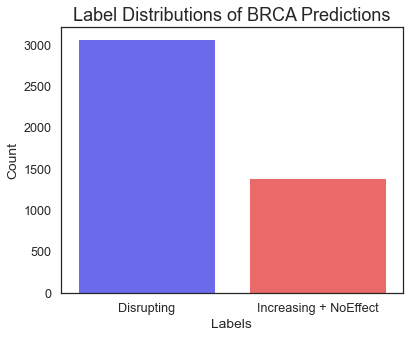

In [149]:
plot_label_distribution_multiple(
    pd.DataFrame({"Label_Predictions": brca_predictions}),
    None, None
   # pd.DataFrame({"Label_Predictions": coad_predictions}),
   # pd.DataFrame({"Label_Predictions": ov_predictions})
)

Cancer data *without* duplicated triplets:

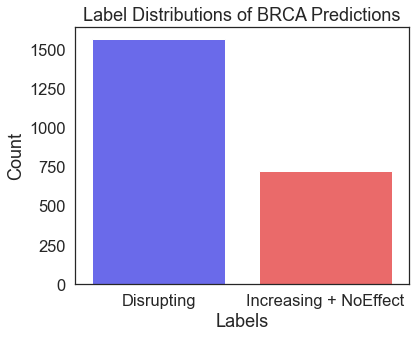

In [150]:
plot_label_distribution_multiple(
    pd.DataFrame({"Label_Predictions": brca_predicted_reduced_data["Predictions"]}),
    None, None
     # pd.DataFrame({"Label_Predictions": coad_predicted_reduced_data["Predictions"]}),
     # pd.DataFrame({"Label_Predictions": ov_predicted_reduced_data["Predictions"]})
)

In [152]:
prediction_label_counts_data = pd.DataFrame(brca_predicted_reduced_data['Predictions'].value_counts())
prediction_label_counts_data.index = ['Disrupting', 'Increasing+NoEff']
prediction_label_counts_data

,Predictions
Disrupting,1569
Increasing+NoEff,723


In [166]:
1569+723

2292

# ========================

## Merging Predictions with SNV Data

Merge prediction column with SNV data.

In [153]:
# BRCA
# Make a copy of brca data
brca_predicted_data = brca.copy(deep=True)

# Insert prediction array values into data as first (0th) column.
brca_predicted_data.insert(0, 'Predictions', brca_predictions)

In [154]:
# # COAD
# # Make a copy of coad data
# coad_predicted_data = coad.copy(deep=True)

# # Insert prediction array values into data as first (0th) column.
# coad_predicted_data.insert(0, 'Predictions', coad_predictions)

In [155]:
# # OV
# # Make a copy of ov data
# ov_predicted_data = ov.copy(deep=True)

# # Insert prediction array values into data as first (0th) column.
# ov_predicted_data.insert(0, 'Predictions', ov_predictions)

In [156]:
pd.DataFrame({
    "BRCA": brca_predicted_data["Predictions"].value_counts().values,
    # "COAD": coad_predicted_data["Predictions"].value_counts().values,
    # "OV": ov_predicted_data["Predictions"].value_counts().values
}, index=["Disrupting", "Increasing+NoEff"])

,BRCA
Disrupting,3065
Increasing+NoEff,1387


In [157]:
brca_predicted_data["Predictions"].value_counts()

0    3065
1    1387
Name: Predictions, dtype: int64

In [158]:
# coad_predicted_data["Predictions"].value_counts()

In [159]:
# ov_predicted_data["Predictions"].value_counts()

In [160]:
pd.DataFrame({
    "BRCA": len(brca),
    # "COAD": len(coad),
    # "OV": len(ov)
}, index=["Predictions made"])

,BRCA
Predictions made,4452


# Exporting Predictions

In [161]:
# BRCA
brca_predicted_data.to_csv("brca_predicted_data_shap_2021-07-27.csv", index=False)

In [162]:
# # COAD
# coad_predicted_data.to_csv("coad_predicted_data.csv", index=False)

In [163]:
# # OV
# ov_predicted_data.to_csv("ov_predicted_data.csv", index=False)

In [164]:
brca_predicted_data[["Predictions", "UniProt_ID", "Mutation", "Interactor_UniProt_ID"]]

,Predictions,UniProt_ID,Mutation,Interactor_UniProt_ID
0,0,Q9UKS6,R24H,Q9BY11
1,1,Q9UKS6,R24H,Q9UNF0
2,0,Q9UKS6,R24H,Q9UNF0-2
3,1,Q9UKS6,R24H,Q5TZC3
4,0,Q9UKS6,R24H,Q6FIA3
...,...,...,...,...
4447,1,P51168,S464F,P37088-6
4448,1,P51168,S464F,P37088-5
4449,1,P51168,S464F,P51170
4450,0,P55795,D146N,P31943
